In [5]:
#!pip install statsmodels
#!pip install scipy

SCROLL TO END FOR ASSIGNMENT


In [ ]:
#import the libraries
import pandas as pd
import numpy as np
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [7]:
# Read Sales.Dirty.xls
salesdf = pd.read_excel(r"C:\Users\saad_\OneDrive\Desktop\BI\Sales.xls")

In [8]:
salesdf.dtypes

Row ID                           int64
Order ID                         int64
Order Date              datetime64[ns]
Order Priority                  object
Order Quantity                   int64
Sales                          float64
Discount                       float64
Ship Mode                       object
Profit                         float64
Unit Price                     float64
Shipping Cost                  float64
Customer Name                   object
Province                        object
Region                          object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Name                    object
Product Container               object
Product Base Margin            float64
Ship Date               datetime64[ns]
dtype: object

In [9]:
salesdf.shape

(8399, 21)

In [10]:
salesdf.head(10)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30
5,86,515,2010-08-28,Not Specified,21,146.6900,0.05,Regular Air,4.4300,6.64,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Furniture,Office Furnishings,G.E. Longer-Life Indoor Recessed Floodlight Bulbs,Small Pack,0.37,2010-08-30
6,97,613,2011-06-17,High,12,93.5400,0.03,Regular Air,-54.0385,7.30,...,Carl Jackson,Nunavut,Nunavut,Corporate,Office Supplies,Binders and Binder Accessories,"Angle-D Binders with Locking Rings, Label Holders",Small Box,0.38,2011-06-17
7,98,613,2011-06-17,High,22,905.0800,0.09,Regular Air,127.7000,42.76,...,Carl Jackson,Nunavut,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Mobile Desk Side File, Wire Frame",Small Box,NaN,2011-06-18
8,103,643,2011-03-24,High,21,2781.8200,0.07,Express Air,-695.2600,138.14,...,Monica Federle,Nunavut,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box,NaN,2011-03-25
9,107,678,2010-02-26,Low,44,228.4100,0.07,Regular Air,-226.3600,4.98,...,Dorothy Badders,Nunavut,Nunavut,Home Office,Office Supplies,Paper,Xerox 198,Small Box,0.38,2010-02-26


## Anova Tests

In [11]:
model = ols('Sales ~ C(Q("Order Priority"))', data=salesdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Sales - Order Priority")
display(anova_table)


Anova => Sales - Order Priority


,sum_sq,df,F,PR(>F)
"C(Q(""Order Priority""))",7.261269e+07,4.0,1.412692,0.226894
Residual,1.078634e+11,8394.0,NaN,NaN


In [12]:
model = ols('Sales ~ C(Q("Ship Mode"))', data=salesdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Sales - Ship Mode")
display(anova_table)


Anova => Sales - Ship Mode


,sum_sq,df,F,PR(>F)
"C(Q(""Ship Mode""))",1.773769e+10,2.0,825.545281,0.0
Residual,9.019834e+10,8396.0,NaN,NaN


In [13]:
model = ols('Sales ~ C(Q("Region"))', data=salesdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Sales - Region")
display(anova_table)


Anova => Sales - Region


,sum_sq,df,F,PR(>F)
"C(Q(""Region""))",1.028260e+08,7.0,1.143053,0.332599
Residual,1.078332e+11,8391.0,NaN,NaN


In [14]:
model = ols('Sales ~ C(Q("Province"))', data=salesdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Sales - Province")
display(anova_table)


Anova => Sales - Province


,sum_sq,df,F,PR(>F)
"C(Q(""Province""))",2.081083e+08,12.0,1.350003,0.182509
Residual,1.077279e+11,8386.0,NaN,NaN


In [15]:
model = ols('Sales ~ C(Q("Customer Segment"))', data=salesdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Sales - Customer Segment")
display(anova_table)


Anova => Sales - Customer Segment


,sum_sq,df,F,PR(>F)
"C(Q(""Customer Segment""))",2.238326e+07,3.0,0.580425,0.627813
Residual,1.079136e+11,8395.0,NaN,NaN


In [16]:
model = ols('Sales ~ C(Q("Product Category"))', data=salesdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Sales - Product Category")
display(anova_table)


Anova => Sales - Product Category


,sum_sq,df,F,PR(>F)
"C(Q(""Product Category""))",9.464206e+09,2.0,403.473146,4.908931e-168
Residual,9.847182e+10,8396.0,NaN,NaN


In [17]:
model = ols('Sales ~ C(Q("Product Sub-Category"))', data=salesdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Sales - Product Sub-Category")
display(anova_table)


Anova => Sales - Product Sub-Category


,sum_sq,df,F,PR(>F)
"C(Q(""Product Sub-Category""))",3.410615e+10,16.0,242.00718,0.0
Residual,7.382988e+10,8382.0,NaN,NaN


In [18]:
model = ols('Sales ~ C(Q("Product Container"))', data=salesdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Sales - Product Container")
display(anova_table)


Anova => Sales - Product Container


,sum_sq,df,F,PR(>F)
"C(Q(""Product Container""))",2.530821e+10,6.0,428.399995,0.0
Residual,8.262781e+10,8392.0,NaN,NaN


## Tukey Tests

In [19]:
salesdf['Ship Mode'].unique()

array(['Regular Air', 'Delivery Truck', 'Express Air'], dtype=object)

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=salesdf['Sales'],
                          groups=salesdf['Ship Mode'],
                          alpha=0.05)

#display results
print(tukey)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1        group2    meandiff  p-adj    lower      upper    reject
-------------------------------------------------------------------------
Delivery Truck Express Air -4226.9291    0.0 -4560.9404 -3892.9178   True
Delivery Truck Regular Air -4234.6538    0.0 -4481.4856  -3987.822   True
   Express Air Regular Air    -7.7247 0.9974  -271.2915   255.8421  False
-------------------------------------------------------------------------


In [21]:
salesdf['Product Category'].unique()

array(['Office Supplies', 'Technology', 'Furniture'], dtype=object)

In [22]:
tukey = pairwise_tukeyhsd(endog=salesdf['Sales'],
                          groups=salesdf['Product Category'],
                          alpha=0.05)

#display results
print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
     group1          group2      meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------------------
      Furniture Office Supplies -2189.7746    0.0 -2416.4055 -1963.1438   True
      Furniture      Technology  -105.8818 0.6101  -367.7801   156.0165  False
Office Supplies      Technology  2083.8928    0.0  1871.3168  2296.4688   True
------------------------------------------------------------------------------


In [23]:
salesdf['Product Sub-Category'].unique()

array(['Storage & Organization', 'Appliances',
       'Binders and Binder Accessories', 'Telephones and Communication',
       'Office Furnishings', 'Paper', 'Rubber Bands',
       'Computer Peripherals', 'Envelopes', 'Bookcases', 'Tables',
       'Labels', 'Pens & Art Supplies', 'Copiers and Fax',
       'Chairs & Chairmats', 'Scissors, Rulers and Trimmers',
       'Office Machines'], dtype=object)

In [24]:
salesdf['Product Sub-Category'].nunique()

17

In [25]:
tukey = pairwise_tukeyhsd(endog=salesdf['Sales'],
                          groups=salesdf['Product Sub-Category'],
                          alpha=0.05)

#display results
print(tukey)

                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                              
            group1                         group2               meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------------------------------------------------------
                    Appliances Binders and Binder Accessories   -580.1508 0.0695  -1178.5716     18.2701  False
                    Appliances                      Bookcases   2654.5191    0.0   1759.7223   3549.3159   True
                    Appliances             Chairs & Chairmats   2866.2062    0.0   2147.8752   3584.5372   True
                    Appliances           Computer Peripherals   -648.1689 0.0285  -1266.2064    -30.1314   True
                    Appliances                Copiers and Fax  11294.5214    0.0  10088.4569   12500.586   True
                    Appliances                      Envelopes   -990.4713 0.0034  -1809.8756   -171.0671

In [26]:
tukey = pairwise_tukeyhsd(endog=salesdf['Sales'],
                          groups=salesdf['Product Container'],
                          alpha=0.05)

#display results
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1     group2    meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------------
 Jumbo Box Jumbo Drum    155.259 0.9809  -390.8024   701.3205  False
 Jumbo Box  Large Box  -197.4478 0.9633  -807.2561   412.3605  False
 Jumbo Box Medium Box -3404.6195    0.0 -4033.0431 -2776.1958   True
 Jumbo Box  Small Box -4132.5012    0.0  -4557.537 -3707.4654   True
 Jumbo Box Small Pack -4731.2225    0.0 -5231.7494 -4230.6956   True
 Jumbo Box   Wrap Bag -5059.4642    0.0 -5543.4782 -4575.4501   True
Jumbo Drum  Large Box  -352.7068 0.5734  -942.7367   237.3231  False
Jumbo Drum Medium Box -3559.8785    0.0 -4169.1284 -2950.6286   True
Jumbo Drum  Small Box -4287.7603    0.0 -4683.8973 -3891.6232   True
Jumbo Drum Small Pack -4886.4816    0.0  -5362.713 -4410.2502   True
Jumbo Drum   Wrap Bag -5214.7232    0.0 -5673.5682 -4755.8782   True
 Large Box Medium Box -3207.1717  

## Chi-Squared Tests

In [27]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# count of occurences of all combinations of the 2 columns
data_crosstab = pd.crosstab(salesdf['Customer Segment'], salesdf['Product Category'], 
margins = False) 
print(data_crosstab) 



Product Category  Furniture  Office Supplies  Technology
Customer Segment                                        
Consumer                358              865         426
Corporate               633             1680         763
Home Office             406             1145         481
Small Business          327              920         395


In [28]:
stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


dof=6
[[ 338.47791404  905.09465413  405.42743184]
 [ 631.38754614 1688.33908799  756.27336588]
 [ 417.09346351 1115.31372782  499.59280867]
 [ 337.04107632  901.25253006  403.70639362]]
significance=0.050, p=0.349
Independent (fail to reject H0)


In [29]:
data_crosstab = pd.crosstab(salesdf['Product Container'], salesdf['Product Category'], 
margins = False) 
print(data_crosstab) 

stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


Product Category   Furniture  Office Supplies  Technology
Product Container                                        
Jumbo Box                488                0          44
Jumbo Drum               374               75         175
Large Box                164              160          82
Medium Box               119               89         158
Small Box                249             3059        1039
Small Pack               210              252         494
Wrap Bag                 120              975          73
dof=12
[[ 109.19966663  292.00142874  130.79890463]
 [ 128.0838195   342.49791642  153.41826408]
 [  83.33658769  222.84319562   99.82021669]
 [  75.12608644  200.88820098   89.98571258]
 [ 892.27622336 2385.95904274 1068.7647339 ]
 [ 196.23097988  524.72437195  235.04464817]
 [ 239.7466365   641.08584355  287.16751994]]
significance=0.050, p=0.000
Dependent (reject H0)


## t-tests

In [30]:
salesdf.dtypes

Row ID                           int64
Order ID                         int64
Order Date              datetime64[ns]
Order Priority                  object
Order Quantity                   int64
Sales                          float64
Discount                       float64
Ship Mode                       object
Profit                         float64
Unit Price                     float64
Shipping Cost                  float64
Customer Name                   object
Province                        object
Region                          object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Name                    object
Product Container               object
Product Base Margin            float64
Ship Date               datetime64[ns]
dtype: object

In [31]:
#Extracts the data types of each column and stores them in a dictionary called types_map. 
#Then select data in numeric format to be kept in a num_columns list. 
# Allows to have the list of all numerical columns

types_map = salesdf.dtypes.to_dict()
num_columns = []
for k,v in types_map.items():
    if np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v):
        num_columns.append(k)

print(num_columns)




['Row ID', 'Order ID', 'Order Quantity', 'Sales', 'Discount', 'Profit', 'Unit Price', 'Shipping Cost', 'Product Base Margin']


In [32]:
# independent two-sample t-test 
# The t-test is used to determine whether there is a significant difference between the means of these two samples.

t_val, p_val = stats.ttest_ind(salesdf[num_columns[3]], salesdf[num_columns[8]])
print("(Sales,Profit) => t-value=%s, p-value=%s" % (str(t_val), str(p_val)))

(Sales,Profit) => t-value=nan, p-value=nan


Nans? 

Possible that one or both of the samples being compared in the t-test contain missing values (NaNs). As a result, the t-test function (stats.ttest_ind) returns NaN values for the t-value and p-value. Attempt to remove the missing values to see the results. Hence, this highlights the importance of DATA WRANGLING before EDA.

In [33]:
salesdf[num_columns[3]].fillna(0, inplace=True)  # Fill missing values with 0
salesdf[num_columns[8]].fillna(0, inplace=True)

t_val, p_val = stats.ttest_ind(salesdf[num_columns[3]], salesdf[num_columns[8]])
print("(Sales,Profit) => t-value=%s, p-value=%s" % (str(t_val), str(p_val)))

(Sales,Profit) => t-value=45.38446985207996, p-value=0.0


C:\Users\saad_\AppData\Local\Temp\ipykernel_27604\3326730900.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  salesdf[num_columns[3]].fillna(0, inplace=True)  # Fill missing values with 0
C:\Users\saad_\AppData\Local\Temp\ipykernel_27604\3326730900.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

Comparing 'Sales' and 'Profit' could be more appropriately approached using correlation analysis, such as Pearson correlation coefficient, which measures the linear relationship between two continuous variables.

Better example here could have been to compare a categorical variable with 2 categories VS Sales. Example, a comparison of gender and sales or if there were 2 categories however, we are limited to the columns available in this dataset. 

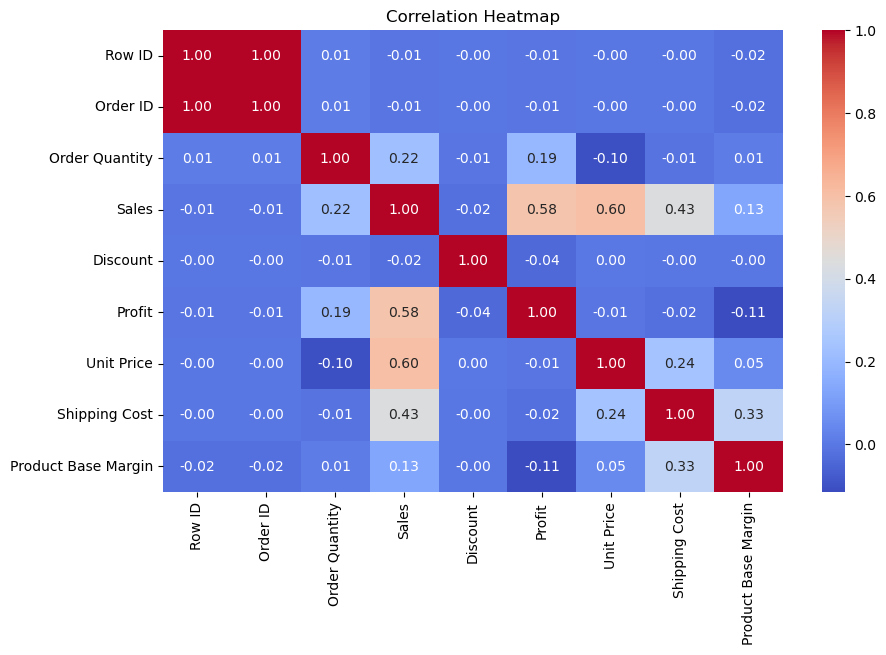

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

plt.figure(figsize=(10, 6))
sns.heatmap(salesdf.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [35]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming 'salesdf' is your dataframe

# List of object columns
object_columns = ['Order Priority', 'Ship Mode', 'Customer Name', 'Province', 
                  'Region', 'Customer Segment', 'Product Category', 'Product Sub-Category', 'Product Container']

# Perform ANOVA and Tukey's HSD for 'Profit' against each object-type column
for col in object_columns:
    # Perform ANOVA using scipy stats (f_oneway)
    groups = [salesdf[salesdf[col] == value]['Profit'] for value in salesdf[col].unique()]
    
    # Perform ANOVA
    f_stat, p_value = stats.f_oneway(*groups)
    
    print(f"ANOVA for Profit vs {col}:")
    print(f"F-statistic: {f_stat}, p-value: {p_value}")
    
    if p_value < 0.05:
        # If ANOVA is significant, perform Tukey's HSD test directly
        tukey = pairwise_tukeyhsd(endog=salesdf['Profit'],
                                  groups=salesdf[col],
                                  alpha=0.05)
        
        print(f"Tukey HSD for Profit vs {col}:")
        print(tukey)
    
    print("\n")


ANOVA for Profit vs Order Priority:
F-statistic: 3.4378071622206123, p-value: 0.008167060076493753
Tukey HSD for Profit vs Order Priority:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1      group2    meandiff p-adj    lower    upper   reject
----------------------------------------------------------------
Critical          High 116.5136 0.0379    4.0696 228.9577   True
Critical           Low 110.7967 0.0585   -2.3922 223.9856  False
Critical        Medium  86.7928 0.2355  -27.8785 201.4641  False
Critical Not Specified  17.0032 0.9942  -96.9679 130.9744  False
    High           Low   -5.717 0.9999 -116.2271 104.7932  False
    High        Medium -29.7208 0.9511 -141.7489  82.3072  False
    High Not Specified -99.5104 0.1051 -210.8217  11.8009  False
     Low        Medium -24.0039 0.9779 -136.7795  88.7718  False
     Low Not Specified -93.7935 0.1502 -205.8571  18.2702  False
  Medium Not Specified -69.7896 0.4485 -183.3504  43.7712  False
----------------

c:\Users\saad_\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Tukey HSD for Profit vs Product Sub-Category:
                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                             
            group1                         group2              meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------------------------------------------------
                    Appliances Binders and Binder Accessories   112.1045 0.9673  -122.3391    346.548  False
                    Appliances                      Bookcases  -401.5497 0.0083  -752.1046   -50.9949   True
                    Appliances             Chairs & Chairmats   163.8271 0.8419  -117.5937   445.2479  False
                    Appliances           Computer Peripherals   -99.4767 0.9928  -341.6055   142.6521  False
                    Appliances                Copiers and Fax  1699.8285    0.0  1227.3281  2172.3288   True
                    Appliances                      Envelopes   -28.0023    1.0  -

In [36]:

import pandas as pd
from scipy.stats import chi2_contingency

# List of object columns
object_columns = ['Order Priority', 'Ship Mode', 'Customer Name', 'Province', 
                  'Region', 'Customer Segment', 'Product Category', 'Product Sub-Category', 
                  'Product Name', 'Product Container']

alpha = 0.05  # Significance level

# Loop through all pairs of object columns
for i in range(len(object_columns)):
    for j in range(i + 1, len(object_columns)):
        col1 = object_columns[i]
        col2 = object_columns[j]
        
        # Generate crosstab
        data_crosstab = pd.crosstab(salesdf[col1], salesdf[col2], margins=False)
        
        # Perform Chi-Square test
        stat, p, dof, expected = chi2_contingency(data_crosstab)
        
        # Print results only if significant
        if p <= alpha:
            print(f"\nChi-Square Test for {col1} vs {col2}:")
            print(f"Degrees of Freedom: {dof}")
            print(f"Significance Level: {alpha:.3f}, p-value: {p:.3f}")
            print("Dependent (Reject H0) - Significant Relationship\n")



Chi-Square Test for Order Priority vs Customer Name:
Degrees of Freedom: 3176
Significance Level: 0.050, p-value: 0.000
Dependent (Reject H0) - Significant Relationship


Chi-Square Test for Order Priority vs Province:
Degrees of Freedom: 48
Significance Level: 0.050, p-value: 0.001
Dependent (Reject H0) - Significant Relationship


Chi-Square Test for Order Priority vs Region:
Degrees of Freedom: 28
Significance Level: 0.050, p-value: 0.001
Dependent (Reject H0) - Significant Relationship


Chi-Square Test for Order Priority vs Product Name:
Degrees of Freedom: 5048
Significance Level: 0.050, p-value: 0.010
Dependent (Reject H0) - Significant Relationship


Chi-Square Test for Ship Mode vs Product Category:
Degrees of Freedom: 4
Significance Level: 0.050, p-value: 0.000
Dependent (Reject H0) - Significant Relationship


Chi-Square Test for Ship Mode vs Product Sub-Category:
Degrees of Freedom: 32
Significance Level: 0.050, p-value: 0.000
Dependent (Reject H0) - Significant Relationsh

INTERPRETATION

Interpretation of heap map:
Sales and Profit have strong positive correlation of 0.58 which means that higher sales generally lead to higher profits.
Similarly Sales and Unit Price also have positive strong corelation 0.60 implying the fact that more expensive products tend to generate higher sales. Shipping Cost and Product Base Margin have corelation of 0.37 which might suggest that higher product base margins are linked to increased shipping costs.
On the other hand if we look at weak corelations then order quantity and unit price have -0.10 between eaach other. This weak negative correlation suggests that higher order quantities are slightly associated with lower unit prices. Similarly discount and profit have -0.04 which means almost no correlation, meaning discounts don't significantly impact profit in this dataset.
Lastly, many variables like Order ID, Row ID, Discount, and many more have correlations close to 0.00, meaning no meaningful relationship exists between them.

Combined Interpretation for ANOVA for profit
Order Priority (p = 0.0082) = Significant: Order priority has a small but meaningful effect on profit.
Ship Mode (p = 0.2101) = Not Significant: Different shipping modes do not impact profit.
Region (p = 0.5121) = Not Significant: Profit does not vary significantly by region.
Province (p = 0.3181) =Not Significant: No strong evidence that province affects profit.
Customer Segment (p = 0.6935) = Not Significant: Different customer segments have no significant impact on profit.
Product Category (p < 0.0001) = Highly Significant: Product category strongly influences profit.
Product Sub-Category (p < 0.0001) = Highly Significant: Different sub-categories have a strong effect on profit.
Product Container (p < 0.0001) = Highly Significant: Type of product container affects profit significantly.

Combined Interpretation for tukey test:
tukey test shows that Critical orders yield significantly higher profits than High-priority orders (p = 0.0379, reject null), while differences with other priorities are not significant (p > 0.05, fail to reject null). Product Category also has a significant impact on Profit (p < 0.0001, reject null), with Technology yielding significantly higher profits than Furniture and Office Supplies (p < 0.0001). Product Sub-Category also significantly affects Profit (p < 0.0001, reject null), with items like Copiers, Office Machines, and Tables showing meaningful differences in profitability. However, Ship Mode (p = 0.21), Customer Name (p = 0.11), Province (p = 0.32), Region (p = 0.51), and Customer Segment (p = 0.69) do not significantly impact Profit (p > 0.05, fail to reject null).

Combined interpretation for chi square test: Printed and shown all the significant correlations between columns with type=object and total of 21 significant correlataion. Customer_name is also part of analysis and is showing significance in 3 case where as usually customer name is removed for accurate prediction.
